In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#! wget 'https://drive.usercontent.google.com/download?id=1X-qv1tBU-0VUUJn9XmGtGhgR1dJqCQIj&export=download&authuser=0' -O dataset.csv 

In [36]:
data = pd.read_csv('dataset.csv')
data[:3]

,x,y,label
0,-69.193657,-67.280357,0
1,-12.406917,51.919646,0
2,-51.739339,-87.262910,0


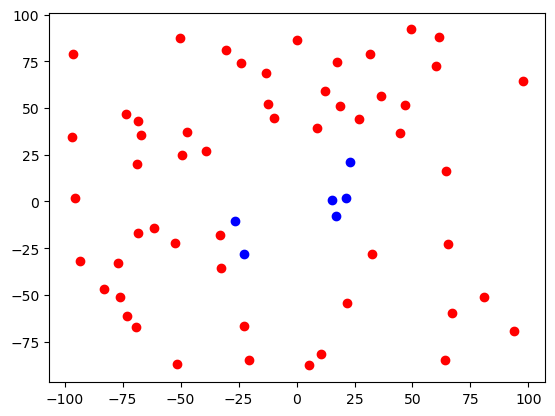

In [37]:
zero_label = data[data['label'] == 0]
one_label  = data[data['label'] == 1]

plt.scatter(zero_label['x'], zero_label['y'], color='red')
plt.scatter(one_label['x'], one_label['y'], color='blue')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(data['x'], data['y']), data['label'], test_size=0.2, random_state=42)

# 2.2, 2.3
we must use the KNN Or SVM  or random forest or neaurl network or logstic regression but the data is not linear and must add feature by kernel.


In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='rbf')  # Using RBF kernel
svm.fit(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))
# Make predictions
y_pred = svm.predict(np.array(X_test).reshape(-1,1))

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


/home/mohammad/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
dataset = pd.read_csv('./MasterData/dataset.csv')
dataset_severity = pd.read_csv('./MasterData/Symptom_severity.csv')
dataset_precaution = pd.read_csv('./MasterData/symptom_precaution.csv')
dataset_description = pd.read_csv('./MasterData/symptom_Description.csv')
dataset.size

88560

In [41]:
dataset

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
from sklearn.preprocessing import LabelEncoder
dataset = np.array(dataset)
for i in range(dataset[0].size):
    dataset[:,i] = LabelEncoder().fit_transform(dataset[:,i])

In [43]:
dataset

array([[15, 33, 35, ..., 3, 3, 1],
       [15, 24, 27, ..., 3, 3, 1],
       [15, 33, 27, ..., 3, 3, 1],
       ...,
       [38, 4, 4, ..., 3, 3, 1],
       [35, 24, 20, ..., 3, 3, 1],
       [27, 24, 18, ..., 3, 3, 1]], dtype=object)

In [44]:
from sklearn.decomposition import PCA


In [45]:
pca = PCA(n_components=8, svd_solver='auto')
pca.fit(dataset)
X_reduced = pca.transform(dataset)



array([[-23.90611238,  -0.46843794,  10.76346266, ..., -10.73775744,
          9.14568503,  -4.4853541 ],
       [ -1.20358072, -31.46023413,   5.86040525, ...,  -0.95684766,
         -1.9527789 ,  -2.3512734 ],
       [ -1.74969286, -32.86545763,   8.74451528, ...,  -7.1571901 ,
          3.0828834 ,  -2.46729385],
       ...,
       [-26.03345079,   2.78744437, -32.69045082, ...,   2.93489563,
         -2.3543492 ,   1.55120037],
       [ -5.82374482,   1.7226431 ,   5.52587383, ...,  -1.16103521,
          2.7215425 ,  11.15473563],
       [ -4.57122824, -25.5281674 , -17.10988965, ...,  -7.68866178,
          4.83944465,   2.61403509]])

In [46]:
X_reduced[0]

array([-23.90611238,  -0.46843794,  10.76346266, -11.93340325,
         0.95001305, -10.73775744,   9.14568503,  -4.4853541 ])